# Introduction
___
* In this notebook, we will be fitting regression models to our cleaned data set. Let's read-in the data set.

In [1]:
# import the libraries necessarry for cleaning and eda
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='white')
plt.style.use('seaborn')

pd.set_option('display.max_columns', 100)  # display max rows and columns
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.2f' % x)  # avoid outputing scientific notation

In [2]:
df = pd.read_csv('cleaned_mlb.csv')  # read in the data 

In [3]:
print(df.shape)  # check the dimensions of the data frame
df.head()  # print the first 5 rows

(810, 51)


,rank,games_behind,night_game,attendance,cli,streak,games_left-games_behind,weekend,weekend_x_night,Apr,Aug,Jul,Jun,Mar,May,Oct,Sep,Friday,Monday,Thursday,Tuesday,Wednesday,ARI,ATL,BAL,BOS,CHC,CHW,CIN,CLE,COL,DET,FLA,HOU,KCR,LAA,LAD,MIA,MIL,MIN,NYY,OAK,PHI,PIT,SDP,SFG,STL,TBR,TEX,TOR,WSN
0,-1.88,1.13,-1.41,41245.00,0.73,0.40,1.68,-0.69,-0.36,2.29,-0.47,-0.42,-0.41,-0.06,-0.46,-0.09,-0.46,-0.42,2.96,-0.37,-0.41,-0.42,-0.21,-0.36,-0.09,-0.06,-0.21,-0.08,-0.21,-0.06,-0.21,-0.11,6.63,-0.12,-0.08,-0.09,-0.20,-0.32,-0.20,-0.10,-0.18,-0.10,-0.36,-0.21,-0.20,-0.21,-0.21,-0.06,-0.08,-0.07,-0.37
1,-0.04,0.99,0.71,38863.00,0.84,-0.39,1.64,-0.69,-0.36,2.29,-0.47,-0.42,-0.41,-0.06,-0.46,-0.09,-0.46,-0.42,-0.34,-0.37,-0.41,2.36,-0.21,-0.36,-0.09,-0.06,-0.21,-0.08,-0.21,-0.06,-0.21,-0.11,6.63,-0.12,-0.08,-0.09,-0.20,-0.32,-0.20,-0.10,-0.18,-0.10,-0.36,-0.21,-0.20,-0.21,-0.21,-0.06,-0.08,-0.07,-0.37
2,0.89,0.99,0.71,25982.00,0.60,-0.78,1.62,-0.69,-0.36,2.29,-0.47,-0.42,-0.41,-0.06,-0.46,-0.09,-0.46,-0.42,-0.34,2.68,-0.41,-0.42,-0.21,-0.36,-0.09,-0.06,-0.21,-0.08,-0.21,-0.06,-0.21,-0.11,6.63,-0.12,-0.08,-0.09,-0.20,-0.32,-0.20,-0.10,-0.18,-0.10,-0.36,-0.21,-0.20,-0.21,-0.21,-0.06,-0.08,-0.07,-0.37
3,-0.96,0.99,0.71,28055.00,0.54,0.40,1.60,-0.69,-0.36,2.29,-0.47,-0.42,-0.41,-0.06,-0.46,-0.09,-0.46,2.35,-0.34,-0.37,-0.41,-0.42,-0.21,-0.36,-0.09,-0.06,-0.21,-0.08,-0.21,-0.06,-0.21,-0.11,-0.15,-0.12,-0.08,-0.09,-0.20,-0.32,-0.20,-0.10,-0.18,-0.10,-0.36,-0.21,-0.20,-0.21,-0.21,-0.06,-0.08,-0.07,2.71
4,0.89,0.86,-1.41,33044.00,0.69,-0.39,1.57,1.45,-0.36,2.29,-0.47,-0.42,-0.41,-0.06,-0.46,-0.09,-0.46,-0.42,-0.34,-0.37,-0.41,-0.42,-0.21,-0.36,-0.09,-0.06,-0.21,-0.08,-0.21,-0.06,-0.21,-0.11,-0.15,-0.12,-0.08,-0.09,-0.20,-0.32,-0.20,-0.10,-0.18,-0.10,-0.36,-0.21,-0.20,-0.21,-0.21,-0.06,-0.08,-0.07,2.71


In [4]:
df.attendance.mean()  # check the mean attendance for all 10 seasons

29996.107407407406

In [6]:
# split the set in a 9:1 seasons ratio
train_set = df[:729]
test_set = df[729:]

## Train-Test Split
___
* We have split the data into a train and a holdout set. Now, we will further split the train set into train and test/validation sets. We will do this in order to check if our models are overfiting to the train set or not.

In [7]:
# import modules for models and evaluations
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

In [8]:
target = train_set['attendance']  # set the target series
features = train_set.drop(columns= 'attendance')  # separate the features from the target

In [9]:
features.shape  # check the shape of the train set

(729, 50)

In [10]:
print('Average attendance for 9 seasons is:', int(target.mean()))  # check the avg. attendance in train
target.shape  

Average attendance for 9 seasons is: 29937


(729,)

In [25]:
# split the train data set
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=9,test_size=0.20)

In [26]:
X_train.shape

(583, 50)

## Modelling Process
____
### Dummy Regressor
We will start with fitting a dummy regressor as our baseline model. This will help us the gauge the improvement of our more complex models.

In [27]:
from sklearn.dummy import DummyRegressor  # import dummy regressor

dummy = DummyRegressor()

In [28]:
dummy.fit(X_train, y_train)  # fit the data on the train set

dummy_preds_test = dummy.predict(X_test)  # predict on the test set

dummy_test_rmse = np.sqrt(mean_squared_error(y_test, dummy_preds_test))  # calculate rmse for the test set

print('Testing RMSE:' , int(dummy_test_rmse))

Testing RMSE: 5987


## Linear Regression

In [29]:
#instantiate a linear regression object
lm = LinearRegression()

lm = lm.fit(X_train, y_train)  #fit the linear regression to the data

y_train_pred = lm.predict(X_train) 
y_test_pred = lm.predict(X_test)  #use fitted model to predict on the test examples


train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))  #evaluate the predictions on the test examples

print('Training RMSE:' , int(train_rmse))
print('Testing RMSE:' , int(test_rmse))

Training RMSE: 4561
Testing RMSE: 4763


In [30]:
# create a dictionary storing all rmse values for the all the subsequent models
rmse_dict = {'Linear Regression': test_rmse}
rmse_dict

{'Linear Regression': 4763.057814075711}

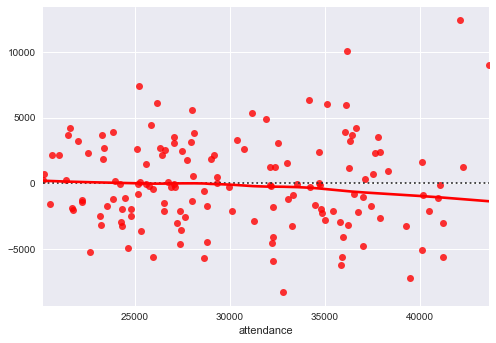

In [31]:
# checl the residuals from this model
sns.residplot( y_test, y_test_pred,lowess=True, color= 'red')
plt.show()

## K-Best Model
* We will now perform some feature selection.
* Using the k-best model we will only the most significant features for our model fitting step.

In [32]:
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression

selector = SelectKBest(f_regression, k=25)  # select the 25 best features

selector.fit(X_train, y_train)  # fit the model on the train data

/Users/farhan/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:295: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) -
/Users/farhan/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


SelectKBest(k=25, score_func=<function f_regression at 0x7fcf3a5800d0>)

In [33]:
selected_columns = X_train.columns[selector.get_support()]  # create a list with the most significant features
removed_columns = X_train.columns[~selector.get_support()]  # create a list of rejected features

In [34]:
print(removed_columns)  # check the columns that have been removed

Index(['streak', 'Aug', 'May', 'ARI', 'BAL', 'CHC', 'CHW', 'CLE', 'COL', 'DET',
       'FLA', 'HOU', 'KCR', 'MIL', 'MIN', 'OAK', 'PHI', 'PIT', 'SDP', 'SFG',
       'STL', 'TBR', 'TEX', 'TOR', 'WSN'],
      dtype='object')


In [35]:
print(selected_columns)  # check the best 25 columns

Index(['rank', 'games_behind', 'night_game', 'cli', 'games_left-games_behind',
       'weekend', 'weekend_x_night', 'Apr', 'Jul', 'Jun', 'Mar', 'Oct', 'Sep',
       'Friday', 'Monday', 'Thursday', 'Tuesday', 'Wednesday', 'ATL', 'BOS',
       'CIN', 'LAA', 'LAD', 'MIA', 'NYY'],
      dtype='object')


In [36]:
lm_kbest = LinearRegression()

lm_kbest = lm_kbest.fit(X_train[selected_columns], y_train)  #fit the linear regression to the data

train_kbest = lm_kbest.predict(X_train[selected_columns])  # predict on the train and test k-best
test_kbest = lm_kbest.predict(X_test[selected_columns])

trainK_rmse = np.sqrt(mean_squared_error(y_train, train_kbest))  # calculate the train-test RMSE
testK_rmse = np.sqrt(mean_squared_error(y_test, test_kbest))

print('Training RMSE:' , int(trainK_rmse))
print('Testing RMSE:' , int(testK_rmse))

Training RMSE: 4657
Testing RMSE: 4691


In [37]:
print('Testing MAE:' , int(mean_absolute_error(y_test, test_kbest)))  # check the mean absolute error

Testing MAE: 3815


In [38]:
rmse_dict['K-Best'] = testK_rmse
rmse_dict

{'Linear Regression': 4763.057814075711, 'k-Best': 4691.093170985697}

* Our scores have imporved and we have reduced dimensionality.

## Polynomial Features
* We will create polynomial interactions from the original train data to see if we can get better scores with this new data set

In [82]:
poly_2 = PolynomialFeatures(degree=2, include_bias=False)  # set 2nd degree polynomial
poly2_data = poly_2.fit_transform(features)
poly2_columns = poly_2.get_feature_names(features.columns)
df_poly2 = pd.DataFrame(poly2_data, columns=poly2_columns)
df_poly2.head()

,rank,games_behind,night_game,cli,streak,games_left-games_behind,weekend,weekend_x_night,Apr,Aug,Jul,Jun,Mar,May,Oct,Sep,Friday,Monday,Thursday,Tuesday,Wednesday,ARI,ATL,BAL,BOS,CHC,CHW,CIN,CLE,COL,DET,FLA,HOU,KCR,LAA,LAD,MIA,MIL,MIN,NYY,OAK,PHI,PIT,SDP,SFG,STL,TBR,TEX,TOR,WSN,...,OAK STL,OAK TBR,OAK TEX,OAK TOR,OAK WSN,PHI^2,PHI PIT,PHI SDP,PHI SFG,PHI STL,PHI TBR,PHI TEX,PHI TOR,PHI WSN,PIT^2,PIT SDP,PIT SFG,PIT STL,PIT TBR,PIT TEX,PIT TOR,PIT WSN,SDP^2,SDP SFG,SDP STL,SDP TBR,SDP TEX,SDP TOR,SDP WSN,SFG^2,SFG STL,SFG TBR,SFG TEX,SFG TOR,SFG WSN,STL^2,STL TBR,STL TEX,STL TOR,STL WSN,TBR^2,TBR TEX,TBR TOR,TBR WSN,TEX^2,TEX TOR,TEX WSN,TOR^2,TOR WSN,WSN^2
0,-1.88,1.13,-1.41,0.73,0.40,1.68,-0.69,-0.36,2.29,-0.47,-0.42,-0.41,-0.06,-0.46,-0.09,-0.46,-0.42,2.96,-0.37,-0.41,-0.42,-0.21,-0.36,-0.09,-0.06,-0.21,-0.08,-0.21,-0.06,-0.21,-0.11,6.63,-0.12,-0.08,-0.09,-0.20,-0.32,-0.20,-0.10,-0.18,-0.10,-0.36,-0.21,-0.20,-0.21,-0.21,-0.06,-0.08,-0.07,-0.37,...,0.02,0.01,0.01,0.01,0.04,0.13,0.07,0.07,0.07,0.08,0.02,0.03,0.03,0.13,0.04,0.04,0.04,0.04,0.01,0.02,0.01,0.08,0.04,0.04,0.04,0.01,0.02,0.01,0.07,0.04,0.04,0.01,0.02,0.01,0.08,0.05,0.01,0.02,0.01,0.08,0.00,0.00,0.00,0.02,0.01,0.01,0.03,0.00,0.03,0.14
1,-0.04,0.99,0.71,0.84,-0.39,1.64,-0.69,-0.36,2.29,-0.47,-0.42,-0.41,-0.06,-0.46,-0.09,-0.46,-0.42,-0.34,-0.37,-0.41,2.36,-0.21,-0.36,-0.09,-0.06,-0.21,-0.08,-0.21,-0.06,-0.21,-0.11,6.63,-0.12,-0.08,-0.09,-0.20,-0.32,-0.20,-0.10,-0.18,-0.10,-0.36,-0.21,-0.20,-0.21,-0.21,-0.06,-0.08,-0.07,-0.37,...,0.02,0.01,0.01,0.01,0.04,0.13,0.07,0.07,0.07,0.08,0.02,0.03,0.03,0.13,0.04,0.04,0.04,0.04,0.01,0.02,0.01,0.08,0.04,0.04,0.04,0.01,0.02,0.01,0.07,0.04,0.04,0.01,0.02,0.01,0.08,0.05,0.01,0.02,0.01,0.08,0.00,0.00,0.00,0.02,0.01,0.01,0.03,0.00,0.03,0.14
2,0.89,0.99,0.71,0.60,-0.78,1.62,-0.69,-0.36,2.29,-0.47,-0.42,-0.41,-0.06,-0.46,-0.09,-0.46,-0.42,-0.34,2.68,-0.41,-0.42,-0.21,-0.36,-0.09,-0.06,-0.21,-0.08,-0.21,-0.06,-0.21,-0.11,6.63,-0.12,-0.08,-0.09,-0.20,-0.32,-0.20,-0.10,-0.18,-0.10,-0.36,-0.21,-0.20,-0.21,-0.21,-0.06,-0.08,-0.07,-0.37,...,0.02,0.01,0.01,0.01,0.04,0.13,0.07,0.07,0.07,0.08,0.02,0.03,0.03,0.13,0.04,0.04,0.04,0.04,0.01,0.02,0.01,0.08,0.04,0.04,0.04,0.01,0.02,0.01,0.07,0.04,0.04,0.01,0.02,0.01,0.08,0.05,0.01,0.02,0.01,0.08,0.00,0.00,0.00,0.02,0.01,0.01,0.03,0.00,0.03,0.14
3,-0.96,0.99,0.71,0.54,0.40,1.60,-0.69,-0.36,2.29,-0.47,-0.42,-0.41,-0.06,-0.46,-0.09,-0.46,2.35,-0.34,-0.37,-0.41,-0.42,-0.21,-0.36,-0.09,-0.06,-0.21,-0.08,-0.21,-0.06,-0.21,-0.11,-0.15,-0.12,-0.08,-0.09,-0.20,-0.32,-0.20,-0.10,-0.18,-0.10,-0.36,-0.21,-0.20,-0.21,-0.21,-0.06,-0.08,-0.07,2.71,...,0.02,0.01,0.01,0.01,-0.27,0.13,0.07,0.07,0.07,0.08,0.02,0.03,0.03,-0.97,0.04,0.04,0.04,0.04,0.01,0.02,0.01,-0.57,0.04,0.04,0.04,0.01,0.02,0.01,-0.55,0.04,0.04,0.01,0.02,0.01,-0.56,0.05,0.01,0.02,0.01,-0.58,0.00,0.00,0.00,-0.17,0.01,0.01,-0.21,0.00,-0.19,7.34
4,0.89,0.86,-1.41,0.69,-0.39,1.57,1.45,-0.36,2.29,-0.47,-0.42,-0.41,-0.06,-0.46,-0.09,-0.46,-0.42,-0.34,-0.37,-0.41,-0.42,-0.21,-0.36,-0.09,-0.06,-0.21,-0.08,-0.21,-0.06,-0.21,-0.11,-0.15,-0.12,-0.08,-0.09,-0.20,-0.32,-0.20,-0.10,-0.18,-0.10,-0.36,-0.21,-0.20,-0.21,-0.21,-0.06,-0.08,-0.07,2.71,...,0.02,0.01,0.01,0.01,-0.27,0.13,0.07,0.07,0.07,0.08,0.02,0.03,0.03,-0.97,0.04,0.04,0.04,0.04,0.01,0.02,0.01,-0.57,0.04,0.04,0.04,0.01,0.02,0.01,-0.55,0.04,0.04,0.01,0.02,0.01,-0.56,0.05,0.01,0.02,0.01,-0.58,0.00,0.00,0.00,-0.17,0.01,0.01,-0.21,0.00,-0.19,7.34


In [83]:
# split the data into train-test sets
X_train, X_test, y_train, y_test = train_test_split(df_poly2, target, random_state=9,test_size=0.2)

### Polynomial: Lasso Model
* We will use lasso regression in order to select the best features from our new polynomialized train data.

In [111]:
from sklearn.linear_model import Lasso, Ridge  
from sklearn.model_selection import GridSearchCV  # import grid search to tweak parameters

lasso = Lasso(normalize=False,)

param_dict={'alpha':[10, 1, 0.1, 0.01], 'max_iter': [1000,10000,100000]}  # set parameters to be searched through

#create the instance of GridSearchCV using the recall metric for our scoring. 
grid_tree= GridSearchCV(lasso, param_dict, cv=5, scoring= 'neg_mean_absolute_error', verbose=1, n_jobs=-1)

In [112]:
#fit the Gridsearch to our data
grid_tree.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  9.0min finished
/Users/farhan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 144190215.7932644, tolerance: 2297650.7372428817
  model = cd_fast.enet_coordinate_descent(


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [10, 1, 0.1, 0.01],
                         'max_iter': [1000, 10000, 100000]},
             scoring='neg_mean_absolute_error', verbose=1)

In [113]:
print(grid_tree.best_score_)  # outputs the best metric score

print(grid_tree.best_params_)  # outputs the parameters with best result

print(grid_tree.best_estimator_)  

-4872.659991881716
{'alpha': 10, 'max_iter': 1000}
Lasso(alpha=10)


In [114]:
y_train_pred = grid_tree.best_estimator_.predict(X_train)  # predict on the train set
y_pred = grid_tree.best_estimator_.predict(X_test)  # predict on the test set

train_rmse_lasso = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred))

print('Training RMSE:', int(train_rmse_lasso))
print('Testing RMSE:', int(test_rmse_lasso))

Training RMSE: 2378
Testing RMSE: 6130


In [118]:
rmse_dict['Poly-Lasso'] = test_rmse_lasso
rmse_dict

{'Linear Regression': 4763.057814075711,
 'k-Best': 4691.093170985697,
 'Poly-K-Best': 4719.733960869721,
 'Dummy Regressor': 5987.977955628345,
 'Poly-Lasso': 6130.957999878932}

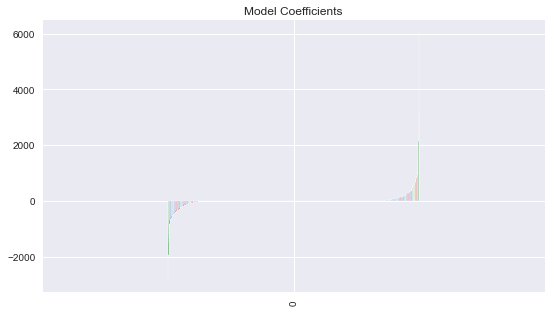

In [136]:
lasso_coef = pd.DataFrame(data=grid_tree.best_estimator_.coef_).T
lasso_coef.columns = X_train.columns
lasso_coef = lasso_coef.T.sort_values(by=0).T
lasso_coef.plot(kind='bar', title='Model Coefficients', legend=False, figsize=(9,5))
plt.show()

* Our RMSE scores have increased significantly. Therefore, we will not increase the degree of polynomial.
* We should incorporate further feature selection in order to avoid the overffitng.

### Polynomial: K-Best Model

In [54]:
selector = SelectKBest(f_regression, k=30)  # select 30 best features from our polynomialized data

selector.fit(X_train, y_train)

SelectKBest(k=30, score_func=<function f_regression at 0x7fcf3a5800d0>)

In [55]:
selected_columns = X_train.columns[selector.get_support()]  # create a list with the most significant features
removed_columns = X_train.columns[~selector.get_support()]  # create a list of rejected features

In [56]:
print(selected_columns)

Index(['rank', 'games_behind', 'cli', 'weekend', 'weekend_x_night', 'NYY',
       'rank CLE', 'games_behind games_left-games_behind', 'games_behind CLE',
       'night_game weekend_x_night', 'cli games_left-games_behind', 'cli CLE',
       'weekend^2', 'weekend Friday', 'weekend CLE', 'weekend_x_night^2',
       'weekend_x_night Friday', 'weekend_x_night CLE', 'Apr NYY',
       'Tuesday Wednesday', 'ARI NYY', 'ATL NYY', 'CHC NYY', 'CLE NYY',
       'COL NYY', 'LAD NYY', 'NYY^2', 'NYY PHI', 'NYY STL', 'NYY WSN'],
      dtype='object')


In [57]:
lm_kbest = LinearRegression()

lm_kbest = lm_kbest.fit(X_train[selected_columns], y_train)  #fit the linear regression to the data

train_kbest = lm_kbest.predict(X_train[selected_columns])  # predict on the train and test k-best
test_kbest = lm_kbest.predict(X_test[selected_columns])

trainK_rmse = np.sqrt(mean_squared_error(y_train, train_kbest))  # calculate the train-test RMSE
testK_rmse = np.sqrt(mean_squared_error(y_test, test_kbest))

print('Training RMSE:' , int(trainK_rmse))
print('Testing RMSE:' , int(testK_rmse))

Training RMSE: 4788
Testing RMSE: 4719


In [58]:
rmse_dict['Poly-K-Best'] = testK_rmse  # add the polynomial k-best test rmse to the rmse dictionary
rmse_dict['Dummy Regressor'] = dummy_test_rmse  # add the dummy regressor rmse to the rmse dictionary
rmse_dict

{'Linear Regression': 4763.057814075711,
 'k-Best': 4691.093170985697,
 'Poly-K-Best': 4719.733960869721,
 'Dummy Regressor': 5987.977955628345}

In [137]:
# create a dataframe from the dictionary with the different models test RMSE values
rmse_df = pd.DataFrame(rmse_dict.values(), columns=['RMSE'], index = rmse_dict.keys())
rmse_df.sort_values(by='RMSE')

,RMSE
k-Best,4691.09
Poly-K-Best,4719.73
Linear Regression,4763.06
Dummy Regressor,5987.98
Poly-Lasso,6130.96


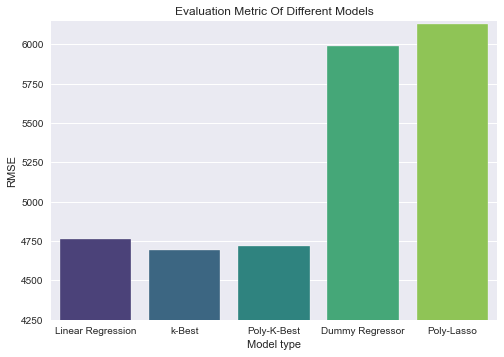

In [177]:
sns.barplot(x= rmse_df.index, y = 'RMSE', data=rmse_df, palette = 'viridis')
plt.ylim(4250, 6150)
plt.xlabel('Model type')
plt.title('evaluation metric of different models'.title())
plt.savefig('Visualizations/model_rmses.png')

The K-Best model is our best model because:
* It achieves the best RMSE scores and
* It is the simplest of all the other models.

## Fit The Best Model On The Holdout Set
___

* We will fit the K-Best model with K = 25 to our holdout set and evaluate it's performance.

In [71]:
test_target = test_set['attendance']  # the series we are predicting

test_features = test_set.drop(columns='attendance')  # the features of the holdout data

In [72]:
selector.fit(test_features, test_target)  # fit the model on the all the holdout features

/Users/farhan/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:295: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) -
/Users/farhan/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/farhan/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:307: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/farhan/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


SelectKBest(k=25, score_func=<function f_regression at 0x7fcf3a5800d0>)

In [73]:
selected_columns = test_features.columns[selector.get_support()]  # create a list with the most significant features
removed_columns = test_features.columns[~selector.get_support()]  # create a list of rejected features

In [70]:
print(selected_columns)  # final set of 25 best features for the model

Index(['rank', 'games_behind', 'night_game', 'streak', 'weekend',
       'weekend_x_night', 'Aug', 'Jul', 'May', 'Sep', 'Monday', 'Tuesday',
       'Wednesday', 'ARI', 'ATL', 'CHC', 'CIN', 'LAD', 'MIA', 'MIN', 'NYY',
       'PIT', 'SDP', 'SFG', 'WSN'],
      dtype='object')


In [74]:
lm_kbest = LinearRegression()

lm_kbest.fit(test_features[selected_columns], test_target)

holdout_kbest = lm_kbest.predict(test_features[selected_columns])  # predict on the train and test k-best

holdoutK_rmse = np.sqrt(mean_squared_error(test_target, holdout_kbest))  # calculate the train-test RMSE

print('Testing RMSE:' , int(holdoutK_rmse))
print('Testing MAE:', int(mean_absolute_error(test_target, holdout_kbest)))

Testing RMSE: 2947
Testing MAE: 2119


* The model has performed exceptionally well on the holdout data.
* This may suggest that our model is better at predicting lone seasons than multiple seasons at once.
* On average, it predicts 2000 ticket sales wrongly for each game.

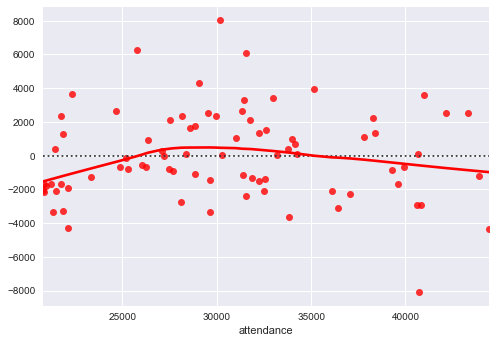

In [75]:
# create a plot of the residuals
sns.residplot(test_target, holdout_kbest, lowess=True, color= 'red')
plt.show()

In [76]:
# match the models coefficients with the features used
values = [float(n) for n in lm_kbest.coef_]  # get all the coefficients from the model in a list
keys = test_features[selected_columns].columns  # get all the columns used in the model

In [77]:
coeff_dict = dict(zip(keys, values))  # create a dictionary with key being the feature and value being the co-eff
print(coeff_dict)

{'rank': -310.8861035802394, 'games_behind': 54.794081175941876, 'night_game': -707.188569932518, 'streak': -1005.54313655153, 'weekend': 809.3197220110806, 'weekend_x_night': 797.8763160423731, 'Aug': 1579.5708911995603, 'Jul': 165.60509149186566, 'May': -829.8716716149138, 'Sep': -1200.8499499911113, 'Monday': -1348.669309815241, 'Tuesday': -1142.329047230551, 'Wednesday': -1242.1430416724825, 'ARI': -318.18455003851966, 'ATL': 73.62165318693195, 'CHC': 430.2378514387454, 'CIN': -1076.3267312374446, 'LAD': 1177.3146462121108, 'MIA': -328.4018104317261, 'MIN': -542.5109169254492, 'NYY': 2822.35460377539, 'PIT': 862.8356849816502, 'SDP': 1233.2415806909491, 'SFG': -477.54865572121906, 'WSN': 1581.8250191242973}


In [78]:
# convert the dictionary into a dataframe
coeff_df = pd.DataFrame(coeff_dict.values(), index = coeff_dict.keys(), columns= ['Co-efficient of feature']).sort_values('Co-efficient of feature')

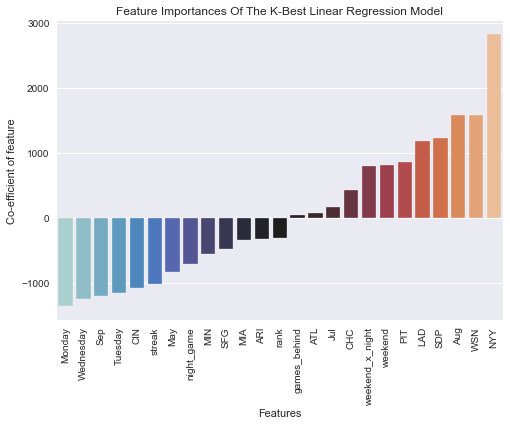

In [186]:
# plot the feature coefficients
# seaborn palettes = icefire, vlag, rocket, deep, viridis, magma, rocket_r, mako, Paired

sns.barplot(x = list(coeff_df.index), y= 'Co-efficient of feature', data=coeff_df, palette= 'icefire')
plt.xticks(rotation = 90)
plt.xlabel('Features')
plt.title('feature importances of the k-best linear regression model'.title())
plt.savefig('Visualizations/feature_imp_kbest.png')

In [187]:
coeff_df[np.abs(coeff_df['Co-efficient of feature']) > 700].index  # most significant features

Index(['Monday', 'Wednesday', 'Sep', 'Tuesday', 'CIN', 'streak', 'May',
       'night_game', 'weekend_x_night', 'weekend', 'PIT', 'LAD', 'SDP', 'Aug',
       'WSN', 'NYY'],
      dtype='object')

From the graph we can clearly see which features out of the K = 25 are most significant for our case.
* Weekend + night games, and opponents like NYY draw in more crowds.
* Weekdays affect attendance negatively, so does playing against CIN, MIN etc.

These results confirm some of our findings from when we initially explored the data.